# Python For Finance 2

[More about this](https://github.com/yhilpisch/py4fi/blob/master/jupyter36/06_Financial_Time_Series.ipynb)

<img src="media/yahoo.jpeg" width="600">

# yahoofinancials 

A powerful financial data module used for pulling fundamental and technical stock data from Yahoo Finance

In [1]:
from yahoofinancials import YahooFinancials

In [2]:
import pandas as pd
from pandas.io.json import json_normalize
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import preprocessing

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
import plotly.offline as plyo
import chart_studio.plotly as py

/usr/lib/python3/dist-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.24.1) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [73]:
#from plotly.graph_objs import FigureWidget

In [74]:
#import cufflinks as cf

In [113]:
ticker = 'TSLA'
yahoo_financials = YahooFinancials(ticker)

yahoo_financials

## Extracting Company Information
I extracted a lot of material to work with!! This might take a couple of minutes to load.

In [114]:
historical_stock_prices = yahoo_financials.get_historical_price_data('2009-10-02', '2019-10-02', 'monthly')

In [115]:
historical_stock_prices

{'TSLA': {'eventsData': {},
  'firstTradeDate': {'formatted_date': '2010-06-29', 'date': 1277798400},
  'currency': 'USD',
  'instrumentType': 'EQUITY',
  'timeZone': {'gmtOffset': -14400},
  'prices': [{'date': 1275364800,
    'high': 30.420000076293945,
    'low': 17.540000915527344,
    'open': 19.0,
    'close': 23.829999923706055,
    'volume': 35953400,
    'adjclose': 23.829999923706055,
    'formatted_date': '2010-06-01'},
   {'date': 1277956800,
    'high': 25.920000076293945,
    'low': 14.979999542236328,
    'open': 25.0,
    'close': 19.940000534057617,
    'volume': 64575800,
    'adjclose': 19.940000534057617,
    'formatted_date': '2010-07-01'},
   {'date': 1280635200,
    'high': 22.18000030517578,
    'low': 17.389999389648438,
    'open': 20.5,
    'close': 19.479999542236328,
    'volume': 15038200,
    'adjclose': 19.479999542236328,
    'formatted_date': '2010-08-01'},
   {'date': 1283313600,
    'high': 23.15999984741211,
    'low': 19.5,
    'open': 19.620000839

### Normalize

In [116]:
stock = json_normalize(historical_stock_prices)
stock.head()

,TSLA.currency,TSLA.firstTradeDate.date,TSLA.firstTradeDate.formatted_date,TSLA.instrumentType,TSLA.prices,TSLA.timeZone.gmtOffset
0,USD,1277798400,2010-06-29,EQUITY,"[{'date': 1275364800, 'high': 30.4200000762939...",-14400


In [118]:
prices = stock['TSLA.prices']
prices[0]

[{'date': 1275364800,
  'high': 30.420000076293945,
  'low': 17.540000915527344,
  'open': 19.0,
  'close': 23.829999923706055,
  'volume': 35953400,
  'adjclose': 23.829999923706055,
  'formatted_date': '2010-06-01'},
 {'date': 1277956800,
  'high': 25.920000076293945,
  'low': 14.979999542236328,
  'open': 25.0,
  'close': 19.940000534057617,
  'volume': 64575800,
  'adjclose': 19.940000534057617,
  'formatted_date': '2010-07-01'},
 {'date': 1280635200,
  'high': 22.18000030517578,
  'low': 17.389999389648438,
  'open': 20.5,
  'close': 19.479999542236328,
  'volume': 15038200,
  'adjclose': 19.479999542236328,
  'formatted_date': '2010-08-01'},
 {'date': 1283313600,
  'high': 23.15999984741211,
  'low': 19.5,
  'open': 19.6200008392334,
  'close': 20.40999984741211,
  'volume': 18045900,
  'adjclose': 20.40999984741211,
  'formatted_date': '2010-09-01'},
 {'date': 1285905600,
  'high': 21.8700008392334,
  'low': 20.0,
  'open': 20.690000534057617,
  'close': 21.84000015258789,
  'vo

### Create Data Frame from Dictionary 

In [119]:
price_df = pd.DataFrame.from_dict(prices[0])
price_df.head()

,adjclose,close,date,formatted_date,high,low,open,volume
0,23.830000,23.830000,1275364800,2010-06-01,30.420000,17.540001,19.000000,35953400
1,19.940001,19.940001,1277956800,2010-07-01,25.920000,14.980000,25.000000,64575800
2,19.480000,19.480000,1280635200,2010-08-01,22.180000,17.389999,20.500000,15038200
3,20.410000,20.410000,1283313600,2010-09-01,23.160000,19.500000,19.620001,18045900
4,21.840000,21.840000,1285905600,2010-10-01,21.870001,20.000000,20.690001,6547800


### Change Dates to DateTime

In [120]:
price_df['date']=pd.to_datetime(price_df['formatted_date']) 
price_df.head()

,adjclose,close,date,formatted_date,high,low,open,volume
0,23.830000,23.830000,2010-06-01,2010-06-01,30.420000,17.540001,19.000000,35953400
1,19.940001,19.940001,2010-07-01,2010-07-01,25.920000,14.980000,25.000000,64575800
2,19.480000,19.480000,2010-08-01,2010-08-01,22.180000,17.389999,20.500000,15038200
3,20.410000,20.410000,2010-09-01,2010-09-01,23.160000,19.500000,19.620001,18045900
4,21.840000,21.840000,2010-10-01,2010-10-01,21.870001,20.000000,20.690001,6547800


In [121]:
price_df = price_df.set_index(price_df['date'])
price_df.head()

,adjclose,close,date,formatted_date,high,low,open,volume
date,,,,,,,,
2010-06-01,23.830000,23.830000,2010-06-01,2010-06-01,30.420000,17.540001,19.000000,35953400
2010-07-01,19.940001,19.940001,2010-07-01,2010-07-01,25.920000,14.980000,25.000000,64575800
2010-08-01,19.480000,19.480000,2010-08-01,2010-08-01,22.180000,17.389999,20.500000,15038200
2010-09-01,20.410000,20.410000,2010-09-01,2010-09-01,23.160000,19.500000,19.620001,18045900
2010-10-01,21.840000,21.840000,2010-10-01,2010-10-01,21.870001,20.000000,20.690001,6547800


In [122]:
price_df = price_df.drop(['date', 'formatted_date'], axis=1)
price_df.head()

,adjclose,close,high,low,open,volume
date,,,,,,
2010-06-01,23.830000,23.830000,30.420000,17.540001,19.000000,35953400
2010-07-01,19.940001,19.940001,25.920000,14.980000,25.000000,64575800
2010-08-01,19.480000,19.480000,22.180000,17.389999,20.500000,15038200
2010-09-01,20.410000,20.410000,23.160000,19.500000,19.620001,18045900
2010-10-01,21.840000,21.840000,21.870001,20.000000,20.690001,6547800


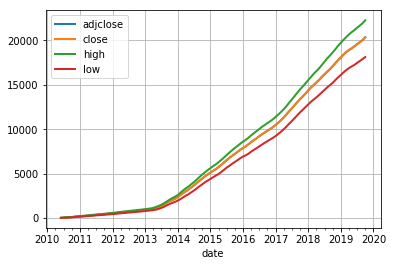

In [123]:
%matplotlib inline
price_df.iloc[:,0:4].cumsum().plot(lw=2.0, grid=True)

### Visualize Closing Price

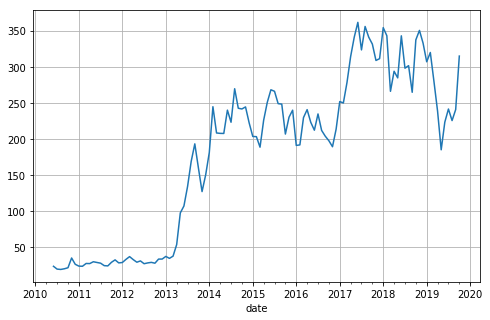

In [125]:
price_df['close'].plot(figsize=(8, 5), grid=True)

### Close Vs. Volume Traded

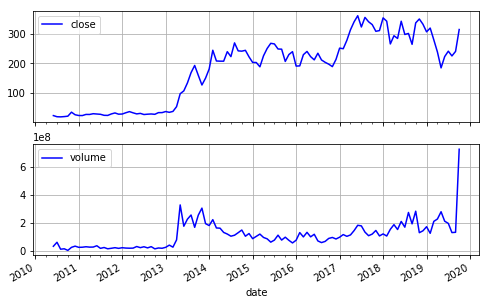

In [126]:
price_df[['close', 'volume']].plot(subplots=True, style='b',
                              figsize=(8, 5), grid=True);

## [Rolling](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html)

* Provide rolling window calculations
* **Window:** Size of the moving window. This is the number of observations used for calculating the statistic. Each window will be a fixed size.

In [80]:
price_df['42d'] = price_df['close'].rolling(window=42).mean()
price_df['252d'] = price_df['close'].rolling(window=252).mean()

In [81]:
price_df.head()

,adjclose,close,high,low,open,volume,42d,252d
date,,,,,,,,
2015-10-01,111.527328,119.500000,121.220001,107.309998,109.070000,1112512100,NaN,NaN
2015-11-01,110.407394,118.300003,123.820000,111.000000,120.800003,750640600,NaN,NaN
2015-12-01,98.657883,105.260002,119.860001,104.820000,118.750000,921915200,NaN,NaN
2016-01-01,91.234650,97.339996,105.849998,92.389999,102.610001,1271848000,NaN,NaN
2016-02-01,90.625412,96.690002,98.889999,92.589996,96.470001,810862600,NaN,NaN


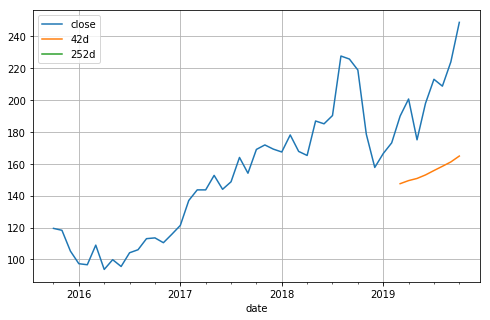

In [82]:
price_df[['close', '42d', '252d']].plot(figsize=(8, 5), grid=True)

## Calculate Return

**Shift** Shift index by desired number of periods with an optional time freq.

In [127]:
price_df['close'].shift(1).head()

date
2010-06-01          NaN
2010-07-01    23.830000
2010-08-01    19.940001
2010-09-01    19.480000
2010-10-01    20.410000
Name: close, dtype: float64

In [128]:
price_df['close'].head()

date
2010-06-01    23.830000
2010-07-01    19.940001
2010-08-01    19.480000
2010-09-01    20.410000
2010-10-01    21.840000
Name: close, dtype: float64

In [85]:
price_df['return_log'] = np.log(price_df['close'] / price_df['close'].shift(1)-1)
price_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning:

invalid value encountered in log



,adjclose,close,high,low,open,volume,42d,252d,return_log
date,,,,,,,,,
2015-10-01,111.527328,119.500000,121.220001,107.309998,109.070000,1112512100,NaN,NaN,NaN
2015-11-01,110.407394,118.300003,123.820000,111.000000,120.800003,750640600,NaN,NaN,NaN
2015-12-01,98.657883,105.260002,119.860001,104.820000,118.750000,921915200,NaN,NaN,NaN
2016-01-01,91.234650,97.339996,105.849998,92.389999,102.610001,1271848000,NaN,NaN,NaN
2016-02-01,90.625412,96.690002,98.889999,92.589996,96.470001,810862600,NaN,NaN,NaN


In [129]:
price_df['return'] = (price_df['close'] / price_df['close'].shift(1)-1)
price_df.head()

,adjclose,close,high,low,open,volume,return
date,,,,,,,
2010-06-01,23.830000,23.830000,30.420000,17.540001,19.000000,35953400,NaN
2010-07-01,19.940001,19.940001,25.920000,14.980000,25.000000,64575800,-0.163240
2010-08-01,19.480000,19.480000,22.180000,17.389999,20.500000,15038200,-0.023069
2010-09-01,20.410000,20.410000,23.160000,19.500000,19.620001,18045900,0.047741
2010-10-01,21.840000,21.840000,21.870001,20.000000,20.690001,6547800,0.070064


### Plot Return 

Logarithmic Return

In [130]:
price_df[['close', 'return_log']].plot(subplots=True, style='b',
                              figsize=(8, 5), grid=True);

KeyError: "['return_log'] not in index"

Return (No transformation)

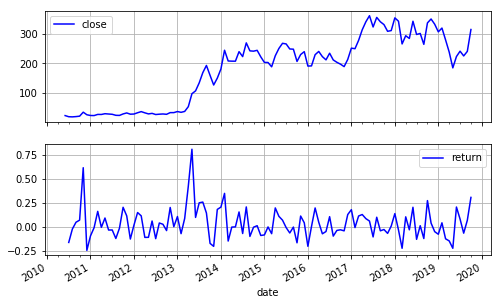

In [131]:
price_df[['close', 'return']].plot(subplots=True, style='b',
                              figsize=(8, 5), grid=True);

### [Annualized Volatility](https://www.fool.com/knowledge-center/how-to-calculate-annualized-volatility.aspx)

In [89]:
price_df['mov_vol'] = price_df['return'].rolling(window=252).std() * math.sqrt(252)

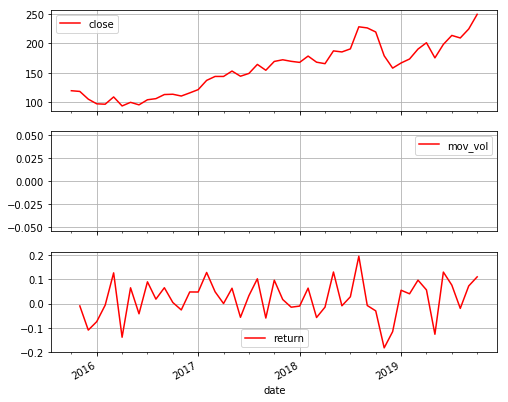

In [90]:
price_df[['close', 'mov_vol', 'return']].plot(subplots=True, style='r',
                                         figsize=(8, 7), grid=True);

## CAPM (Capital Asset Pricing Model)

<img src="media/capm.jpg" width="400">

**Beta:**
The beta of a potential investment is a measure of how much risk the investment will add to a portfolio that looks like the market. If a stock is riskier than the market, it will have a beta greater than one. If a stock has a beta of less than one, the formula assumes it will reduce the risk of a portfolio.

#### 1. Get information of a Market (I'll use S&P 500)

In [132]:
ticker = 'SPX'
yahoo_financials = YahooFinancials(ticker)
historical_stock_prices = yahoo_financials.get_historical_price_data('2009-10-02', '2019-10-02', 'monthly')

In [133]:
stock = json_normalize(historical_stock_prices)
prices = stock['SPX.prices']
price_sp = pd.DataFrame.from_dict(prices[0])
price_sp['date']=pd.to_datetime(price_sp['formatted_date']) 
price_sp = price_sp.set_index(price_sp['date'])
price_sp = price_sp.drop(['date', 'formatted_date'], axis=1)

In [134]:
price_sp.head()

,adjclose,close,high,low,open,volume
date,,,,,,
2009-10-01,0.08512,0.08512,0.10575,0.05159,0.05159,37374324
2009-11-01,0.06706,0.06706,0.34977,0.06706,0.08512,9938432
2009-12-01,0.04643,0.04643,0.34977,0.04643,0.06706,9972320
2010-01-01,0.04643,0.04643,0.42472,0.04127,0.05159,4132515
2010-02-01,0.04024,0.04024,0.39973,0.04024,0.39973,1905588


In [135]:
stock_close  = price_df[['close']]
stock_close.columns = ['stock_close']
stock_close.head()

,stock_close
date,
2010-06-01,23.830000
2010-07-01,19.940001
2010-08-01,19.480000
2010-09-01,20.410000
2010-10-01,21.840000


In [95]:
len(stock_close)

49

In [136]:
price_sp['return'] = price_sp['close'] / price_sp['close'].shift(1)-1
sp_close  = price_sp[['close']]
sp_close.columns = ['sp_close']
sp_close.head()

,sp_close
date,
2009-10-01,0.08512
2009-11-01,0.06706
2009-12-01,0.04643
2010-01-01,0.04643
2010-02-01,0.04024


In [137]:
len(sp_close)

100

#### 2. Combine information with the same dates

In [138]:
beta_df = sp_close.join(stock_close)
beta_df.head()

,sp_close,stock_close
date,,
2009-10-01,0.08512,NaN
2009-11-01,0.06706,NaN
2009-12-01,0.04643,NaN
2010-01-01,0.04643,NaN
2010-02-01,0.04024,NaN


In [139]:
len(beta_df)

100

#### 3. Normalize (So that we can see better how prices are distributed in a Plot)

**If we don't**

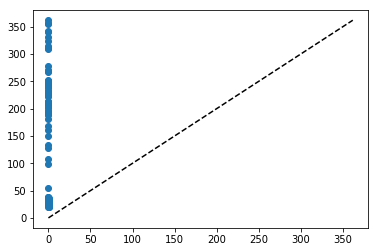

In [140]:
qn_a = beta_df['sp_close']
qn_b = beta_df['stock_close']

plt.plot(qn_a,qn_b, ls="", marker="o")

x = np.linspace(np.min((qn_a.min(),qn_b.min())), np.max((qn_a.max(),qn_b.max())))
plt.plot(x,x, color="k", ls="--")

plt.show()

In [141]:
x = beta_df.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
beta_df_norm = pd.DataFrame(x_scaled)

In [142]:
beta_df_norm = beta_df_norm.dropna()
beta_df_norm.head()

,0,1
8,0.071356,0.012714
9,0.607338,0.001345
10,1.000000,0.000000
11,0.106114,0.002718
12,0.372522,0.006898


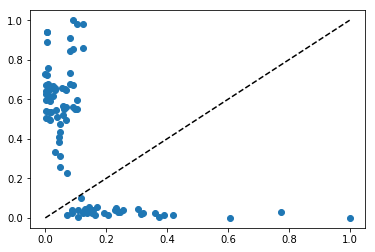

In [143]:
qn_a = beta_df_norm[0]
qn_b = beta_df_norm[1]

plt.plot(qn_a,qn_b, ls="", marker="o")

x = np.linspace(np.min((qn_a.min(),qn_b.min())), np.max((qn_a.max(),qn_b.max())))
plt.plot(x,x, color="k", ls="--")

plt.show()

#### Simple Linear Regression To Understand Our Data

In [144]:
xdat = qn_a.values
ydat = qn_b.values
reg = np.polyfit(x=xdat, y=ydat, deg=1)
reg

array([-1.13952664,  0.5400826 ])

Text(0, 0.5, 'AAPL returns')

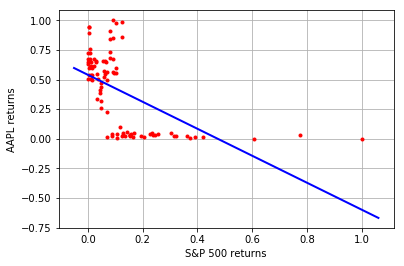

In [145]:

plt.plot(xdat, ydat, 'r.')
ax = plt.axis()  # grab axis values
x = np.linspace(ax[0], ax[1] + 0.01)
plt.plot(x, np.polyval(reg, x), 'b', lw=2)
plt.grid(True)
plt.axis('tight')
plt.xlabel('S&P 500 returns')
plt.ylabel('AAPL returns')

### Going Back To CAPM Formula 

<img src="media/beta.jpg" width="400">

In [146]:
correl = beta_df.corr()
correl

,sp_close,stock_close
sp_close,1.000000,-0.565269
stock_close,-0.565269,1.000000


In [147]:
correl = correl.iloc[1,0]
correl

-0.5652694396901161

In [148]:
st_sp = beta_df_norm[0].std()
st_sp

0.1600595975595888

In [149]:
st_stock = beta_df_norm[1].std()
st_stock

0.32266413537490507

## OUR BETA (Correlation Method)

In [150]:
beta = correl*(st_stock/st_sp)
beta

-1.1395266375299071

## OUR BETA (Covariance/Variance)

In [111]:
covar = beta_df.cov()
covar

,sp_close,stock_close
sp_close,0.000308,0.256375
stock_close,0.256375,702.167000


In [59]:
covar = covar.iloc[1,0]
covar

0.2728004150660252

In [60]:
var_sp = beta_df_norm[0].var()
var_sp

0.07067007524869147

In [61]:
beta_2 =o covar/var_sp
beta_2

3.860197036808396